<h1 align=center><font size = 5> UNDERSTANDING CONVOLUTIONS</font></h1>


<a id="ref1"></a>
# Analogies

There are several ways to understand Convolutional Layers without using a mathematical approach. We are going to explore some of the ideas proposed by the Machine Learning community.

### Instances of Neurons

When you start to learn a programming language, one of the first phases of your development is the learning and application of functions. Instead of rewriting pieces of code everytime that you would, a good engineer is encouraged to code using functional programming, keeping the code organized, clear and concise.
CNNs can be thought of as a simplification of what is really going on, a special kind of neural network which uses identical copies of the same neuron. These copies include the same parameters (shared weights and biases) and activation functions.

### Location and type of connections

In a fully connected layer NN, each neuron is connected to every neuron in the previous layer, and each connection has it's own weight. This is a totally general purpose connection pattern and makes no assumptions about the features in the input data thus not using any advantage that the knowledge of the data being used can bring. These types of layers are also very expensive in terms of memory and computation.

In contrast, in a convolutional layer each neuron is only connected to a few nearby local neurons in the previous layer, and the same set of weights is used to connect to them. For example, in the following image, the neurons in the h1 layer are connected only to some input units (pixels).
      
<img src="https://ibm.box.com/shared/static/mev168hepixnmc9zhh4hsr3t2ks3rpcc.png" alt="HTML5 Icon" style="width:500px;height:500px;">
<center> A figure presented in one of Lecun's papers. It shows the spatial relation and how the connections are modified until the output layer<a> [[ref]](http://help.sketchup.com/en) </a> </center> 

### Feature Learning

Feature engineering is the process of extracting useful patterns from input data that will help the prediction model to understand better the real nature of the problem. A good feature learning will present patterns in a way that increase significantly the accuracy and performance of the applied machine learning algorithms in a way that would be impossible or too expensive by the machine learning itself.

Feature learning algorithms find the common patterns that are important to distinguish between the wanted classes and extract them automatically. After this process, they are ready to be used in a classification or regression problem. 

The great advantage of CNNs is that they are uncommonly good at finding features in images that grow after each level, resulting in high-level features in the end. The final layers (can be one or more) use all these generated features for classification or regression. 

Basically, Convolutional Neural Networks are your best friend today to __automatically do Feature Engineering__ (Feature Learning) without wasting too much time creating your own codes and with no need of expertise in the field of Feature Engineering.

<img src="https://ibm.box.com/shared/static/urzzkc7o5loqrlezcvn4kr594mxi9ftx.png" alt="HTML5 Icon" style="width:650px;height:250px;">
<center> Example of feature learning (automatically feature engineering), starting with simple features and ending with high-level features like human faces. <a> [[ref]](https://devblogs.nvidia.com/parallelforall/deep-learning-nutshell-core-concepts/) </a> </center> 


### Image Filter

__How to create a convolved freature from an image ?__  
The image below is a 8x8 matrix of an image's pixels, converted to sing binary values in the next image(left), where 1 means a white pixel and 0 a black pixel. Later we will find out that typically this is a normalization, these values can actually have different scales. The most commmon usage is values between 0 and 255 for 8-bit grayscale images.  

<img src="https://ibm.box.com/shared/static/0s5v7doe2p5xuzifs47bxmmuwrn3kra2.bmp" alt="HTML5 Icon" style="width:200px;height:200px;">
<center> An example of a low resolution image to be recognized. <a> [[ref]](http://help.sketchup.com/en) </a> </center> 

In the below image, with an animation, you can see how the two-dimensional convolution operation would operate on the images. This operation is performed in most of the Deep Learning frameworks in their first phase. We need a sliding windows to create the convolved matrix:

$
kernel=
\begin{bmatrix}
     1          & 0      & 1     \\
     0          & 1    & 0     \\
     1          & 0    & 1
\end{bmatrix}
\\
$ 




The sliding window (a.k.a kernel, filter or feature detector) with a preset calculation ([[x1, x0,x1], [x0,x1,x0], [x1,x0,x1]]) goes through the image and creates a new matrix (feature map).

 <img src="https://ibm.box.com/shared/static/fvutcm8jwa5j2o7xv2zzqyz2yu3zwhz4.gif" alt="HTML5 Icon" style="width:450px;height:300px;">
<center>  Animations showing how a kernel interact with a matrix representing an image. <a> [[ref]](http://cs231n.github.io/convolutional-networks/) </a> </center>  
 
 
In the example above we used a 3×3 filter (5x5 could also be used, but would be too complex). The values from the filter were multiplied element-wise with the original matrix (input image), then summed up. To get the full convolved matrix, the algorithm keep repeating this small procedure for each element by sliding the filter over the whole original matrix.

<img src="https://ibm.box.com/shared/static/7maczejdeej0qoz3pzkysw0y8qb70g2h.png" alt="HTML5 Icon" style="width:500px;height:200px;"> 
<center>  Illustration of the operation for one position of the kernel. <a> [[ref]](http://colah.github.io/posts/2014-07-Understanding-Convolutions/) </a> </center>

Just like the referenced example, we can think of a one-dimensional convolution as sliding function (1x1 or 1x2 filter) multiplying and adding on top of an array (1 dimensional array, instead of the original matrix).  
 
__What is the output of applying a kernel on an image?__   
The famous GIMP (Open Source Image Editor) has an explanation about the convolution operation applied to images that can help us understand how Neural Networks will interact with this tool.

<img src="https://ibm.box.com/shared/static/wixvbo9pk0f6r6ln879ah9jjo0ua0fo5.png" alt="HTML5 Icon" style="width:700px;height:350px;"> 
<center>   Applying the left kernel to the image will result into a blurr effect.<a> [[ref]](http://colah.github.io/posts/2014-07-Understanding-Convolutions/) </a> </center>


Well, this is very good if you want nice effects for your social media photos, but in the field of computer vision you need detailed patterns (remember feature learning) that are almost erased using a kernel like that. A more suitable example would be the Kernel/filter that shows edges from photos (the first recognizable feature of an image).


__Lets try another kernel: __  
Taking the values −1 and 1 on two adjacent pixels and zero everywhere else for the kernel, result in the following image. That is, we subtract two adjacent pixels. When side by side pixels are similar, this gives us approximately zero. On edges, however, adjacent pixels are very different in the direction perpendicular to the edge. Knowing that results distant from zero will result in brighter pixels, you can already guess the result of this type of kernel.

<img src="https://ibm.box.com/shared/static/z673yijcsfqs5rd8auc1dwmtkejyizv0.png" alt="HTML5 Icon" style="width:700px;height:350px;">
<center> Applying the new left kernel to the image will result into a edge detection, this output is normallly useful for the initial layers of a CNN.<a> [[ref]](http://colah.github.io/posts/2014-07-Understanding-Convolutions/) </a> </center>

***


<a id="ref3"></a>
# Coding with TensorFlow

Numpy is great because it has high optmized matrix operations implemented in a backend using C/C++. However, if our goal is to work with DeepLearning, we need much more. TensorFlow does the same work, but instead of returning to Python everytime, it creates all the operations in the form of graphs and execute them once with the highly optimized backend.

Suppose that you have two tensors:

* 3x3 filter (4D tensor = [3,3,1,1] = [width, height, channels, number of filters])
* 10x10 image (4D tensor = [1,10,10,1] = [batch size, width, height, number of channels]

The output size for zero padding 'SAME' mode will be:  
* the same as input = 10x10  

The output size without zero padding 'VALID' mode:  
* input size - kernel dimension +1 = 10 -3 + 1 = 8 = 8x8 

In [26]:
import tensorflow as tf

#Building graph

input = tf.Variable(tf.random_normal([1,10,10,1]))
filter = tf.Variable(tf.random_normal([3,3,1,1]))
op = tf.nn.conv2d(input, filter, strides=[1, 1, 1, 1], padding='VALID')
op2 = tf.nn.conv2d(input, filter, strides=[1, 1, 1, 1], padding='SAME')

#Initialization and session
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)

    print("Input \n")
    print('{0} \n'.format(input.eval()))
    print("Filter/Kernel \n")
    print('{0} \n'.format(filter.eval()))
    print("Result/Feature Map with valid positions \n")
    result = sess.run(op)
    print(result)
    print('\n')
    print("Result/Feature Map with padding \n")
    result2 = sess.run(op2)
    print(result2)

Input 

[[[[-0.2333986 ]
   [-1.60222459]
   [-0.59922189]
   [ 1.16410959]
   [-0.76737589]
   [ 0.09314293]
   [ 1.19891262]
   [-0.66649938]
   [ 0.28275484]
   [-0.34996071]]

  [[-0.5782572 ]
   [ 1.98558891]
   [ 0.50288594]
   [ 0.00582131]
   [ 0.1621462 ]
   [-0.35673964]
   [ 0.36184272]
   [ 0.51090974]
   [-0.23347045]
   [-1.22336304]]

  [[-0.74590033]
   [ 0.59876555]
   [ 1.399634  ]
   [-0.1985817 ]
   [ 1.80230248]
   [-0.42760956]
   [ 0.14139481]
   [ 0.42020592]
   [-0.24457332]
   [ 0.0177379 ]]

  [[ 0.54029077]
   [-1.10108566]
   [-0.75304198]
   [ 0.19669688]
   [ 1.48324931]
   [ 1.57738423]
   [-0.2026927 ]
   [ 0.12725548]
   [ 1.66746807]
   [ 0.0705769 ]]

  [[-1.14247799]
   [-1.41177237]
   [ 0.71039778]
   [-1.22525907]
   [ 0.44034255]
   [ 0.68016934]
   [-0.28458789]
   [ 1.09259582]
   [-2.23008561]
   [-0.43365544]]

  [[-0.61714113]
   [ 0.58758152]
   [ 1.12787592]
   [-1.22966528]
   [ 1.5204109 ]
   [ 2.0295217 ]
   [-0.97594738]
   [-0.287451

----------------

<a id="ref4"></a>
# Convolution applied on images

### Read and display image by coverting it to a gray scale.   

Read the input image as float data type as Tensorflow accepts images in float format. 

Upload your own image (drag and drop to this window) and type its name on the input field on the next cell (press _shift + enter_). The result of this pre-processing will be an image with only a greyscale channel.

In [55]:
# download standard image
!wget --quiet https://flavorwire.files.wordpress.com/2014/03/broad-city-photo-credit-ali-goldstein-e1394660205982.jpg --output-document broadcity.jpg

### Let's import the TensorFlow library and Python dependencies

In [56]:
#Importing
import numpy as np
import sys
from scipy import signal
from scipy import misc
import matplotlib.pyplot as plt
from PIL import Image


####  Run this Cell to experiment with Broad City Image.  RGB with Size (512, 512)

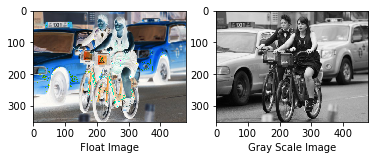

In [66]:
#read the image as Float data type
im=misc.imread("broadcity.jpg").astype(np.float)

#im=misc.imread("one.png").astype(np.float)

#Convert image to gray scale
grayim=np.dot(im[...,:3], [0.299, 0.587, 0.114])


#Plot the images
%matplotlib inline

plt.subplot(1, 2, 1)
plt.imshow(im)
plt.xlabel(" Float Image ")

plt.subplot(1, 2, 2)
plt.imshow(grayim, cmap=plt.get_cmap("gray"))
plt.xlabel(" Gray Scale Image ")


Please type the name of your test image after uploading to your notebook (just drag and grop for upload. Please remember to type the extension of the file. Default: bird.jpg

 Original type: <PIL.Image.Image image mode=L size=480x351 at 0x11E80D278> 


After conversion to numerical representation: 

 array([[ 59,  59,  58, ...,  63,  74,  85],
       [ 70,  70,  69, ...,  63,  75,  86],
       [ 80,  80,  80, ...,  64,  76,  88],
       ..., 
       [144, 151, 152, ..., 170, 169, 165],
       [143, 137, 129, ..., 167, 166, 171],
       [141, 127, 116, ..., 172, 169, 174]], dtype=uint8)

 Input image converted to gray scale: 



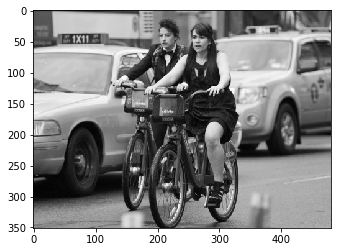

In [63]:
im = Image.open('broadcity.jpg')  # type here your image's name

# uses the ITU-R 601-2 Luma transform (there are several 
# ways to convert an image to grey scale)

image_gr = im.convert("L")    
print("\n Original type: %r \n\n" % image_gr)

# convert image to a matrix with values from 0 to 255 (uint8) 
arr = np.asarray(image_gr) 
print("After conversion to numerical representation: \n\n %r" % arr) 
### Activating matplotlib for Ipython
%matplotlib inline

### Plot image

imgplot = plt.imshow(arr)
imgplot.set_cmap('gray')  #you can experiment different colormaps (gray,winter,autumn)
print("\n Input image converted to gray scale: \n")
plt.show(imgplot)

Now, we will experiment using an edge detector kernel.

In [69]:
kernel = np.array([
                        [ 0, 1, 0],
                        [ 1,-4, 1],
                        [ 0, 1, 0],
                                     ]) 

grad = signal.convolve2d(arr, kernel, mode='same', boundary='symm')

GRADIENT MAGNITUDE - Feature map


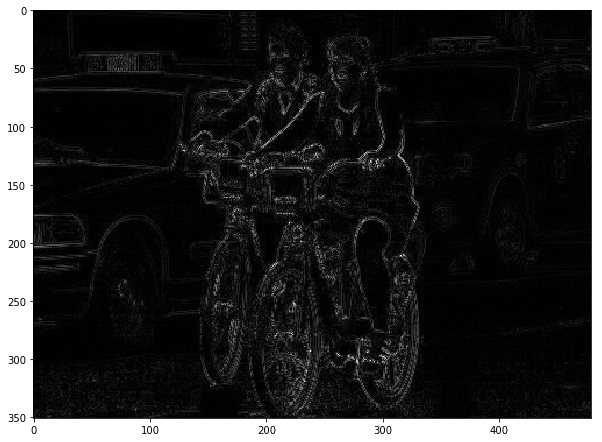

In [70]:
%matplotlib inline

print('GRADIENT MAGNITUDE - Feature map')

fig, aux = plt.subplots(figsize=(10, 10))
aux.imshow(np.absolute(grad), cmap='gray')


If we change the kernel and start to analyse the outputs we would be acting as a CNN. The difference is that a Neural Network do all this work automatically (the kernel adjustment using different weights). In addition, we can understand how biases affect the behaviour of feature maps

_Please note that when you are dealing with most of the real applications of CNNs, you usually convert the pixels values to a range from 0 to 1. This process is called normalization._

In [71]:
type(grad)

grad_biases = np.absolute(grad) + 100

grad_biases[grad_biases > 255] = 255


GRADIENT MAGNITUDE - Feature map


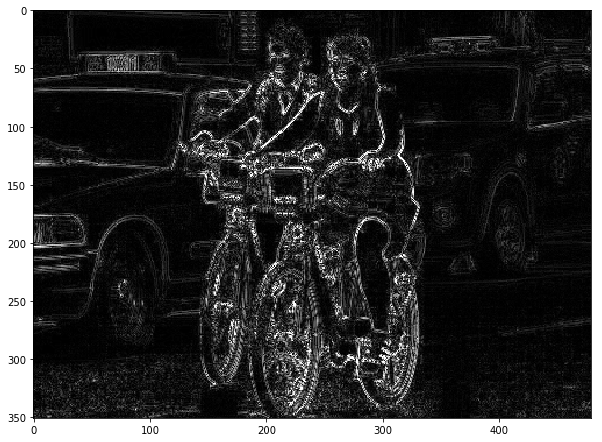

In [72]:
%matplotlib inline

print('GRADIENT MAGNITUDE - Feature map')

fig, aux = plt.subplots(figsize=(10, 10))
aux.imshow(np.absolute(grad_biases), cmap='gray')

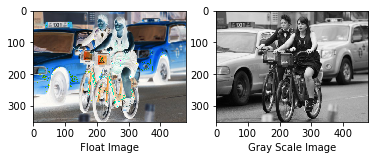

In [73]:
#read the image as Float data type
im=misc.imread("broadcity.jpg").astype(np.float)

#im=misc.imread("one.png").astype(np.float)

#Convert image to gray scale
grayim=np.dot(im[...,:3], [0.299, 0.587, 0.114])


#Plot the images
%matplotlib inline

plt.subplot(1, 2, 1)
plt.imshow(im)
plt.xlabel(" Float Image ")

plt.subplot(1, 2, 2)
plt.imshow(grayim, cmap=plt.get_cmap("gray"))
plt.xlabel(" Gray Scale Image ")


In [89]:
print(grayim.shape)

(351, 480)


In [90]:
Image = np.expand_dims(np.expand_dims(grayim, 0), -1)

print (Image.shape)

(1, 351, 480, 1)


In [91]:
img= tf.placeholder(tf.float32, [1,351,480,1])
print (img.get_shape().as_list())

[1, 351, 480, 1]


In [92]:
shape=[5,5,1,1]
weights =tf.Variable(tf.truncated_normal(shape, stddev=0.05))
print (weights.get_shape().as_list())

[5, 5, 1, 1]


In [93]:
ConOutSAME = tf.nn.conv2d(input=img, filter=weights, strides=[1, 1, 1, 1], padding='SAME')

ConOutVALID = tf.nn.conv2d(input=img, filter=weights, strides=[1, 1, 1, 1], padding='VALID')



In [94]:
init = tf.global_variables_initializer()
sess= tf.Session()
sess.run(init)

In [102]:
result = sess.run(ConOutSAME,feed_dict={img:Image})

In [103]:
result2 = sess.run(ConOutVALID,feed_dict={img:Image})


In [104]:
# for the result with 'SAME' Padding 

#reduce the dimension
vec = np.reshape(result, (1, -1));
# Reshape the image
image= np.reshape(vec,(351,480))

print (image.shape)




(351, 480)


In [106]:
#reduce the dimension
vec2 = np.reshape(result2, (1, -1));
# Reshape the image
image2= np.reshape(vec2,(347,476))

print (image2.shape)

(347, 476)


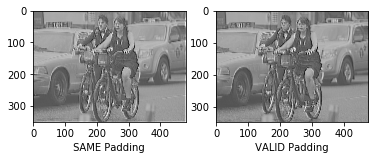

In [107]:
#Plot the images
%matplotlib inline

plt.subplot(1, 2, 1)
plt.imshow(image,cmap=plt.get_cmap("gray"))
plt.xlabel(" SAME Padding ")

plt.subplot(1, 2, 2)
plt.imshow(image2, cmap=plt.get_cmap("gray"))
plt.xlabel(" VALID Padding ")

In [108]:
def conv2d (X,W):
    
    #Your Code Goes Here
    return tf.nn.conv2d(input=X,filter=W,strides=[1, 1, 1, 1],padding='SAME')

    
 

def MaxPool (X):
    
    #Your Code Goes Here
    return tf.nn.max_pool(X, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')


In [109]:
weights = {
        # 5 x 5 convolution, 1 input image, 32 outputs
    'W_conv1': tf.Variable(tf.random_normal([5, 5, 1, 32]))

     
    }

biases = {
        #bias should be of the size of number of Outputs
    'b_conv1': tf.Variable(tf.random_normal([32]))
       
        
    }

In [111]:

conv1 = tf.nn.relu(conv2d(img, weights['W_conv1']) + biases['b_conv1'])

Mxpool = MaxPool (conv1)

    
print (conv1.get_shape().as_list())

print (Mxpool.get_shape().as_list())

[1, 351, 480, 32]
[1, 176, 240, 32]


In [112]:
init = tf.global_variables_initializer()
sess= tf.Session()
sess.run(init)

In [113]:
Layer1 = sess.run(Mxpool,feed_dict={img:Image})

(1, 176, 240, 32)
(176, 240, 32)


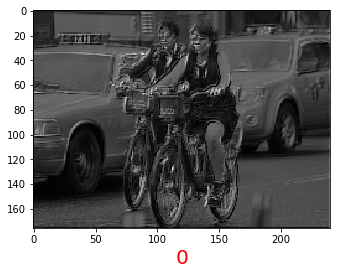

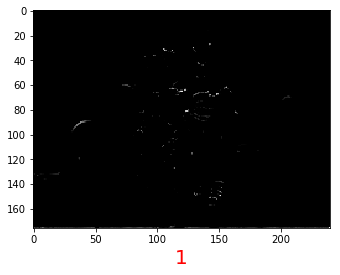

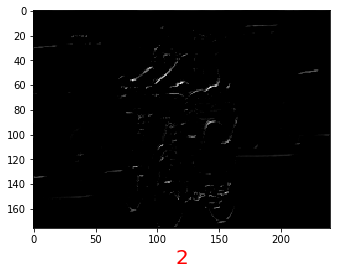

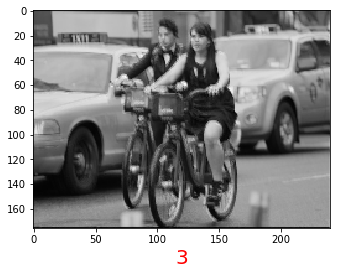

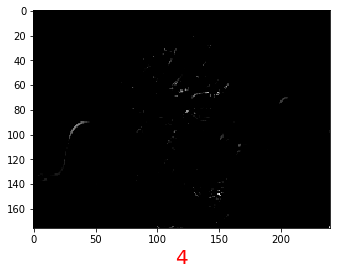

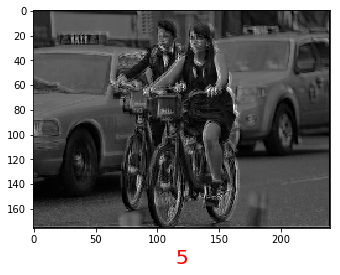

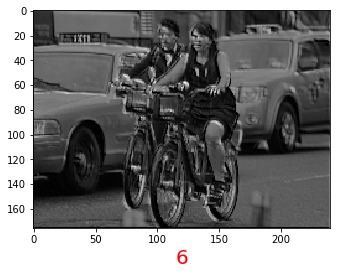

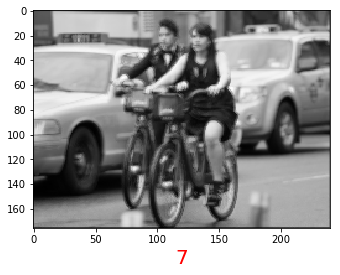

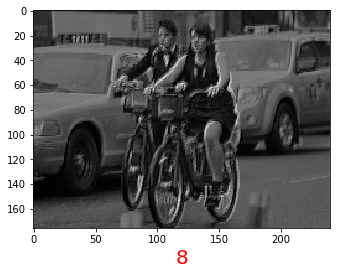

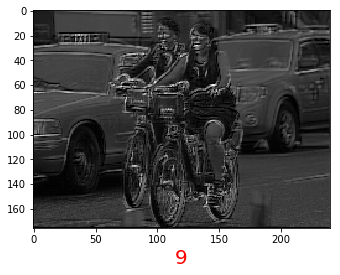

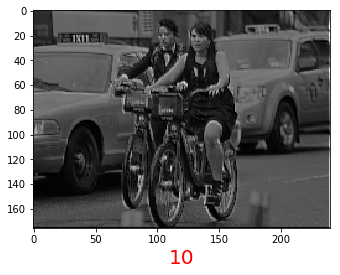

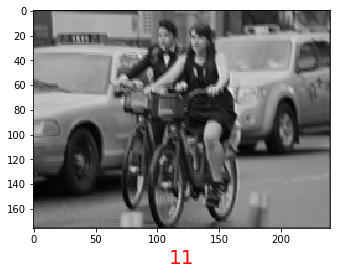

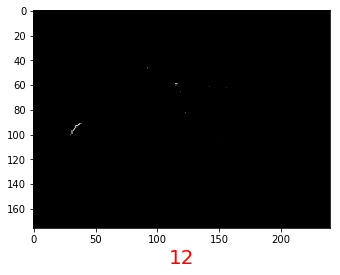

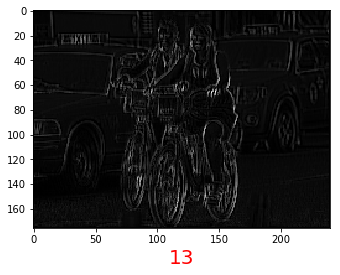

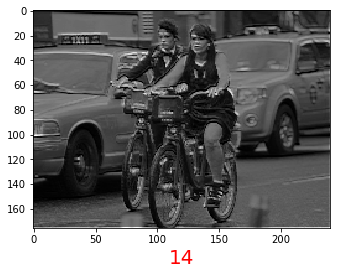

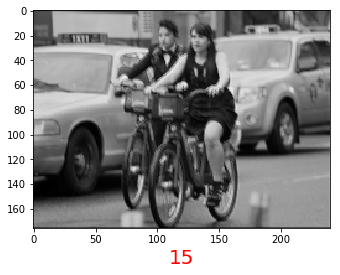

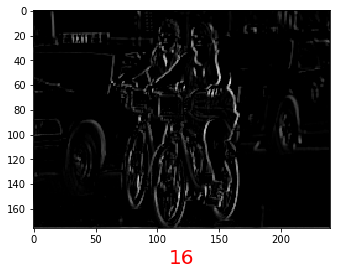

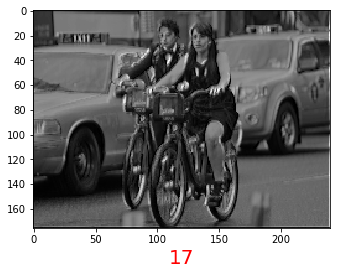

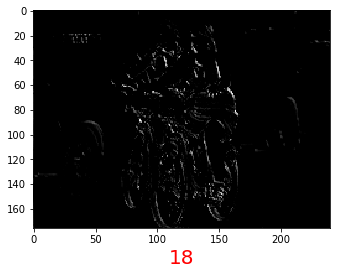

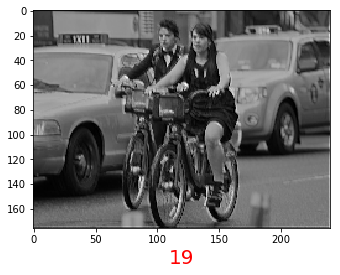

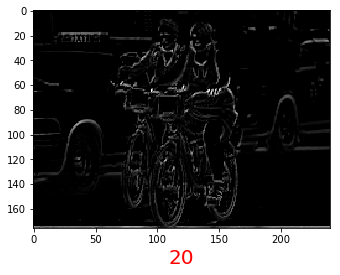

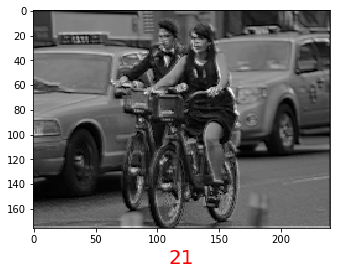

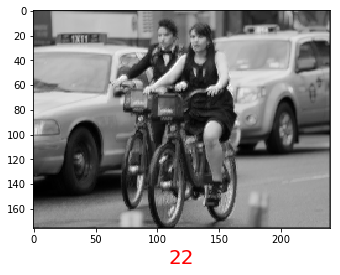

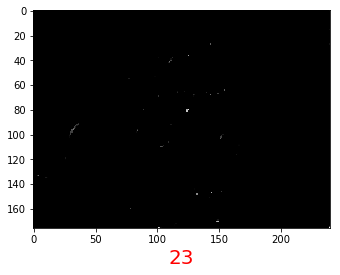

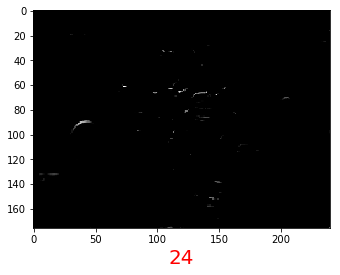

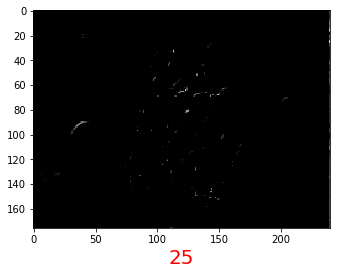

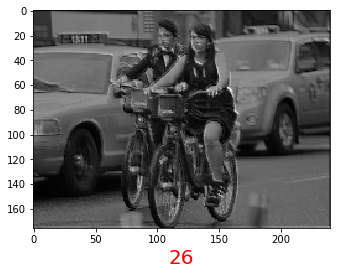

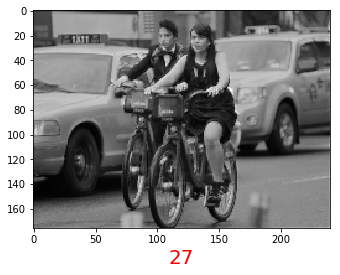

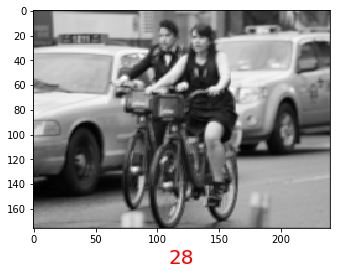

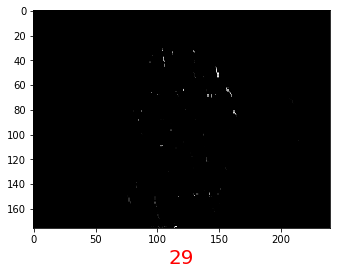

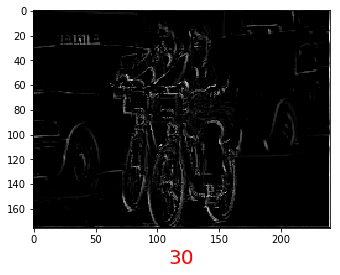

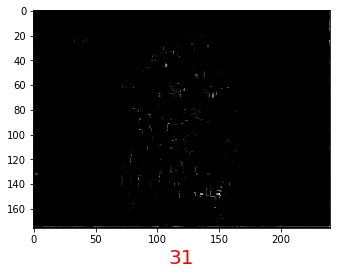

In [116]:
print (Layer1.shape)

vec = np.reshape(Layer1, (176,240,32));
print (vec.shape)

for i in range (32):
    
    image=vec[:,:,i]
    #print image
    #image *= 255.0/image.max() 
    #print image
    plt.imshow(image,cmap=plt.get_cmap("gray"))
    plt.xlabel( i , fontsize=20, color='red')
    plt.show()
    plt.close()


Please feel free to experiemnt with different values of: Padding, Kernel Size to see how the output varies

The Idea behind this code is to gain understanding on how to apply convolutions and other functions on Images. We are NOT training Neural Network here, however just checking the effects of changing parameters of the above functions which are basic building blocks of any Deep Convolution neural Networks.  